In [1]:
import sys, os
sys.path.insert(0,os.path.join('..','..'))

from fmdtools.modeldef import *
import fmdtools.resultdisp as rd
import fmdtools.faultsim.propagate as prop
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
import multiprocessing as mp
import scipy.stats as stats


import multiprocessing as mp

In [2]:
from rover_model_human import *
from rover_model import plot_trajectories, plot_map

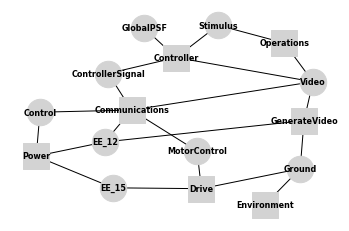

In [3]:
mdl = Rover()
fig, ax = rd.graph.show(mdl, gtype='bipartite')

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Execution Order'}>)

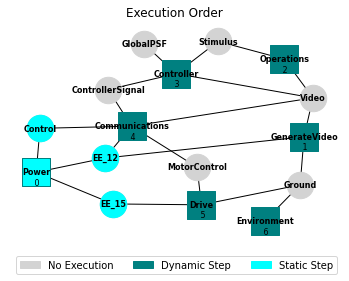

In [4]:
rd.graph.exec_order(mdl, gtype='bipartite')

In [5]:
act_pos={'Press': [0.942, 0.076], 'ComprehendOut': [0.302, 0.452], 'SeeOut': [0.028, 0.732], 
             'Project': [0.499, 0.46], 'PressOut': [0.958, -0.07], 'Reach': [0.797, 0.175], 
             'ProjectOut': [0.482, 0.302], 'ReachOut': [0.806, 0.041], 'Comprehend': [0.317, 0.595], 
             'Look': [0.038, 0.877], 'Decide': [0.667, 0.308], 'DecideOut': [0.652, 0.189], 
             'Signal': [0.721, 0.736], 'Percieve': [0.165, 0.738], 'PercieveOut': [0.102, 0.594], 
             'Video': [0.418, 0.889], 'Stimulus': [0.026, 1.034], 'LocalPSF': [0.717, 0.484], 
             'GlobalPSF': [0.521, 0.836]}

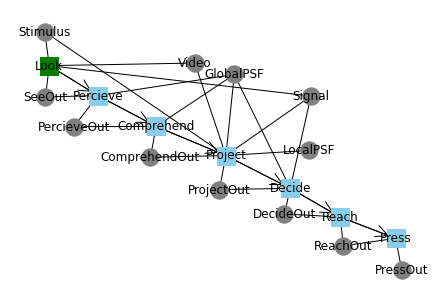

In [6]:
fig = mdl.fxns['Controller'].show_ASG(pos=act_pos, with_cond_labels=False)

In [7]:
fig.savefig("action_graph.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

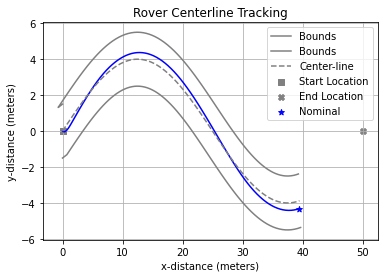

In [8]:
mdl = Rover(params=gen_params('sine', amp=4))
endresults, mdlhist = prop.nominal(mdl)
plot_map(mdl, mdlhist)

In [9]:
app_human = SampleApproach(mdl, faults='Controller', phases={'start':[0,50]})

In [10]:
app_human.sampletimes

{('global',
  'start'): {25: [('Controller', 'stuck_power'),
   ('Controller', 'stuck_turn'),
   ('Controller', 'failed_look'),
   ('Controller', 'perc_failed_S1_temp'),
   ('Controller', 'perc_failed_S2_temp'),
   ('Controller', 'perc_failed_Video'),
   ('Controller', 'perc_failed_Video_temp'),
   ('Controller', 'perc_failed_noaction'),
   ('Controller', 'perc_failed_S1'),
   ('Controller', 'perc_failed_S2'),
   ('Controller', 'comp_failed_S1_temp'),
   ('Controller', 'comp_failed_S2_temp'),
   ('Controller', 'comp_failed_Video'),
   ('Controller', 'comp_failed_Video_temp'),
   ('Controller', 'comp_failed_noaction'),
   ('Controller', 'comp_failed_S1'),
   ('Controller', 'comp_failed_S2'),
   ('Controller', 'proj_failed_noturn'),
   ('Controller', 'proj_failed_turn_left'),
   ('Controller', 'proj_failed_turn_right'),
   ('Controller', 'proj_failed_noaction'),
   ('Controller', 'proj_failed_poweron'),
   ('Controller', 'proj_failed_poweroff'),
   ('Controller', 'proj_failed_nopower'),


In [11]:
endclasses,mdlhists = prop.approach(mdl, app_human)

SCENARIOS COMPLETE:  17%|██████████▊                                                    | 6/35 [00:00<00:01, 21.76it/s]C:\Users\dhulse\Documents\GitHub\fmdtools\example_rover\HFAC_Analyses\..\..\fmdtools\modeldef.py:801: UserWarning: The screen is already not visible to the operator. All faults removed.
  if warnmessage: self.warn(warnmessage, "All faults removed.")
SCENARIOS COMPLETE:  51%|███████████████████████████████▉                              | 18/35 [00:00<00:00, 21.81it/s]C:\Users\dhulse\Documents\GitHub\fmdtools\rad_models\rover\rover_model_human.py:408: UserWarning: The Signal requires a left turn. Fault mode `failed_turn_left' removed.
  self.remove_fault('failed_turn_left', opermode='nominal', warnmessage='The Signal requires a left turn.')
C:\Users\dhulse\Documents\GitHub\fmdtools\rad_models\rover\rover_model_human.py:412: UserWarning: The Signal requires a right turn. Fault mode `failed_turnright' removed.
  self.remove_fault('failed_turnright', opermode='nominal', war

In [12]:
comp_groups={'faulty': [i[0] for i in app_human.scenids.values()],'nominal': ['nominal']}

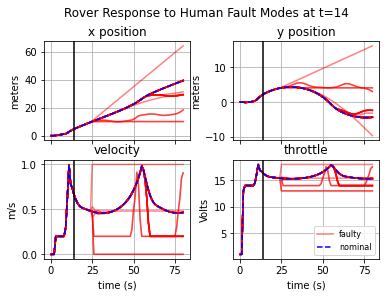

In [13]:
fig, axs = rd.plot.mdlhists(mdlhists, comp_groups=comp_groups, fxnflowvals={'Ground':['vel', 'x','y'], 'Power':'power'}, time_slice=[14],\
                           title="Rover Response to Human Fault Modes at t=14", indiv_kwargs={'faulty':{'alpha':0.5, 'color':'red'}},
                           ylabels={('flows','Ground','x'):'meters',('flows','Ground','y'):'meters', ('flows', 'Ground', 'vel'):'m/s',
                                   ('functions', 'Power', 'power'): 'Volts'}, xlabel='time (s)',
                            titles={('flows','Ground','x'):'x position',('flows','Ground','y'):'y position', ('flows', 'Ground', 'vel'):'velocity',
                                   ('functions', 'Power', 'power'): 'throttle'}, h_padding=0.3)

In [14]:
fig.savefig("rover_fault_behavior.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [15]:
def stress_param_func(stress_param=1.0, experience=1.0):
    return {'stress_param': stress_param, 'experience': experience}

In [16]:
nomapp_human_short = NominalApproach()
#nomapp_human_short.add_seed_replicates('test', 25)
nomapp_human_short.add_param_ranges(stress_param_func, 'test', experience=(1.0,5,1), replicates=10)

In [17]:
deg_mdl_hum_short = HumanDegradationShort(params={'experience' : 1, 'stress_param': 0,'stoch_fatigue':True})
endclasses_human_short, mdlhists_human_short = prop.nominal_approach(deg_mdl_hum_short, nomapp_human_short, run_stochastic=True)

SCENARIOS COMPLETE: 100%|█████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 911.60it/s]


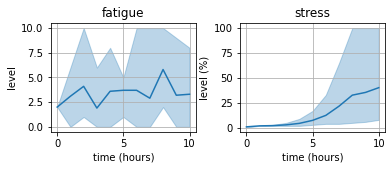

In [18]:
fig, axs = rd.plot.mdlhists(mdlhists_human_short, fxnflowvals={"Control":['fatigue','stress']}, aggregation='mean_bound', xlabel="time (hours)",
                           ylabels={('functions', 'Control', 'fatigue'):'level',('functions','Control','stress'):'level (%)'}, h_padding=0.3,
                           titles={('functions', 'Control', 'fatigue'):'fatigue',('functions','Control','stress'):'stress'})

In [19]:
fig.savefig("degraded_PSFs.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [20]:
nomapp_human_short.num_scenarios

40

In [21]:
behave_nomapp = NominalApproach()
behave_nomapp.add_param_ranges(sample_human_params, 'behave_nomapp', mdlhists_human_short, t=(0,10, 1), scen = (0,nomapp_human_short.num_scenarios))

In [22]:
mdl=Rover()
behave_endclasses_hum, behave_mdlhists_hum = prop.nominal_approach(mdl, behave_nomapp, run_stochastic=True)

SCENARIOS COMPLETE: 100%|████████████████████████████████████████████████████████████| 400/400 [00:19<00:00, 20.86it/s]


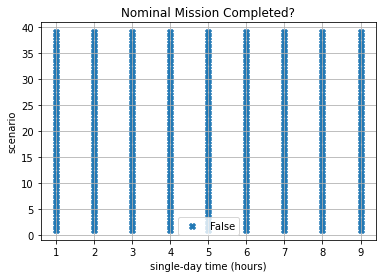

In [23]:
fig = rd.plot.nominal_vals_2d(behave_nomapp, behave_endclasses_hum, 't', 'scen', xlabel='single-day time (hours)', ylabel='scenario',  metric='at_finish', title="Nominal Mission Completed?")

In [24]:
fig.savefig("nominal_PSF_completions.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [25]:
app_drive= SampleApproach(mdl, faults='Operations', phases={'start':[0,50]})

In [26]:
endclasses,mdlhists = prop.approach(mdl, app_drive)

SCENARIOS COMPLETE: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.79it/s]


In [27]:
app_human_nest = NominalApproach()
app_human_nest.add_param_ranges(sample_human_params, 'Communications', mdlhists_human_short, t=(4,9, 4), scen = (0,nomapp_human_short.num_scenarios))

In [28]:
endclasses,mdlhists,apps = prop.nested_approach(mdl, app_human_nest, faults='Communications', phases={'start':[0,50]})

NESTED SCENARIOS COMPLETE:  51%|████████████████████████████▏                          | 41/80 [00:09<00:08,  4.36it/s]

Faults found during the nominal run {'Controller': ['comp_failed_S1_temp']}


NESTED SCENARIOS COMPLETE:  54%|█████████████████████████████▌                         | 43/80 [00:09<00:08,  4.53it/s]

Faults found during the nominal run {'Controller': ['perc_failed_S1_temp', 'perc_failed_Video_temp', 'perc_failed_S2_temp']}
Faults found during the nominal run {'Controller': ['comp_failed_S1_temp']}
Faults found during the nominal run {'Controller': ['comp_failed_S1_temp']}


NESTED SCENARIOS COMPLETE:  56%|██████████████████████████████▉                        | 45/80 [00:10<00:07,  4.55it/s]

Faults found during the nominal run {'Controller': ['comp_failed_S1_temp']}
Faults found during the nominal run {'Controller': ['perc_failed_S1_temp', 'perc_failed_Video_temp', 'perc_failed_S2_temp']}


NESTED SCENARIOS COMPLETE:  59%|████████████████████████████████▎                      | 47/80 [00:10<00:07,  4.65it/s]

Faults found during the nominal run {'Controller': ['comp_failed_S1_temp']}
Faults found during the nominal run {'Controller': ['comp_failed_S1_temp']}


NESTED SCENARIOS COMPLETE:  61%|█████████████████████████████████▋                     | 49/80 [00:11<00:06,  4.75it/s]

Faults found during the nominal run {'Controller': ['perc_failed_S1_temp', 'perc_failed_Video_temp', 'perc_failed_S2_temp']}
Faults found during the nominal run {'Controller': ['comp_failed_S1_temp']}


NESTED SCENARIOS COMPLETE:  65%|███████████████████████████████████▊                   | 52/80 [00:11<00:05,  4.69it/s]

Faults found during the nominal run {'Controller': ['perc_failed_S1_temp', 'perc_failed_Video_temp', 'perc_failed_S2_temp']}


NESTED SCENARIOS COMPLETE:  70%|██████████████████████████████████████▌                | 56/80 [00:12<00:05,  4.58it/s]

Faults found during the nominal run {'Controller': ['perc_failed_S1_temp', 'perc_failed_Video_temp', 'perc_failed_S2_temp']}


NESTED SCENARIOS COMPLETE:  74%|████████████████████████████████████████▌              | 59/80 [00:13<00:04,  4.62it/s]

Faults found during the nominal run {'Controller': ['perc_failed_S1_temp', 'perc_failed_Video_temp', 'perc_failed_S2_temp']}


NESTED SCENARIOS COMPLETE:  78%|██████████████████████████████████████████▋            | 62/80 [00:14<00:03,  4.62it/s]

Faults found during the nominal run {'Controller': ['perc_failed_S1_temp', 'perc_failed_Video_temp', 'perc_failed_S2_temp']}


NESTED SCENARIOS COMPLETE:  82%|█████████████████████████████████████████████▍         | 66/80 [00:15<00:03,  4.51it/s]

Faults found during the nominal run {'Controller': ['perc_failed_S1_temp', 'perc_failed_Video_temp', 'perc_failed_S2_temp']}


NESTED SCENARIOS COMPLETE:  86%|███████████████████████████████████████████████▍       | 69/80 [00:15<00:02,  4.56it/s]

Faults found during the nominal run {'Controller': ['perc_failed_S1_temp', 'perc_failed_Video_temp', 'perc_failed_S2_temp']}


NESTED SCENARIOS COMPLETE:  90%|█████████████████████████████████████████████████▌     | 72/80 [00:16<00:01,  4.44it/s]

Faults found during the nominal run {'Controller': ['perc_failed_S1_temp', 'perc_failed_Video_temp', 'perc_failed_S2_temp']}


NESTED SCENARIOS COMPLETE:  95%|████████████████████████████████████████████████████▎  | 76/80 [00:17<00:00,  4.56it/s]

Faults found during the nominal run {'Controller': ['perc_failed_S1_temp', 'perc_failed_Video_temp', 'perc_failed_S2_temp']}


NESTED SCENARIOS COMPLETE:  99%|██████████████████████████████████████████████████████▎| 79/80 [00:17<00:00,  4.51it/s]

Faults found during the nominal run {'Controller': ['perc_failed_S1_temp', 'perc_failed_Video_temp', 'perc_failed_S2_temp']}


NESTED SCENARIOS COMPLETE: 100%|███████████████████████████████████████████████████████| 80/80 [00:18<00:00,  4.39it/s]


In [29]:
res_comp_hum = rd.tabulate.resilience_factor_comparison(app_human_nest, endclasses, ['t'], 'at_finish', faults='modes')
res_comp_hum

"(t,)",nominal,Communications failed_powercontrol,Communications failed_motorcontrol,Communications failed_video
4,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0


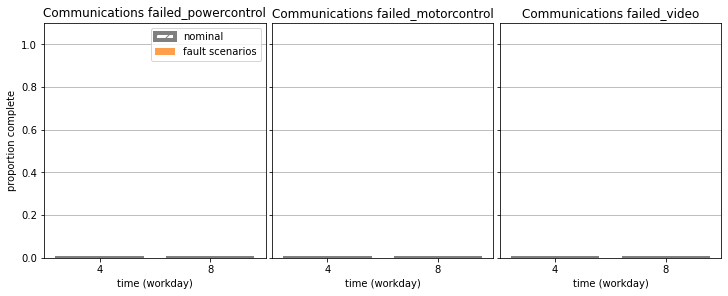

In [30]:
fig = rd.plot.resilience_factor_comparison(res_comp_hum, stack=True, maxy=1.1, xlabel='time (workday)', figsize=(10,4), title="", stat="proportion complete")  

In [31]:
endclasses,mdlhists, apps = prop.nested_approach(mdl, app_human_nest, faults='Operations', phases={'start':[0,1]})

NESTED SCENARIOS COMPLETE:   0%|                                                                | 0/80 [00:00<?, ?it/s]C:\Users\dhulse\Documents\GitHub\fmdtools\example_rover\HFAC_Analyses\..\..\fmdtools\modeldef.py:801: UserWarning: The screen is already not visible to the operator. All faults removed.
  if warnmessage: self.warn(warnmessage, "All faults removed.")
NESTED SCENARIOS COMPLETE:  51%|████████████████████████████▏                          | 41/80 [00:07<00:07,  5.41it/s]

Faults found during the nominal run {'Controller': ['comp_failed_S1_temp']}
Faults found during the nominal run {'Controller': ['perc_failed_S1_temp', 'perc_failed_Video_temp', 'perc_failed_S2_temp']}


NESTED SCENARIOS COMPLETE:  54%|█████████████████████████████▌                         | 43/80 [00:07<00:06,  5.57it/s]

Faults found during the nominal run {'Controller': ['comp_failed_S1_temp']}
Faults found during the nominal run {'Controller': ['comp_failed_S1_temp']}


NESTED SCENARIOS COMPLETE:  56%|██████████████████████████████▉                        | 45/80 [00:07<00:06,  5.81it/s]

Faults found during the nominal run {'Controller': ['comp_failed_S1_temp']}
Faults found during the nominal run {'Controller': ['perc_failed_S1_temp', 'perc_failed_Video_temp', 'perc_failed_S2_temp']}


NESTED SCENARIOS COMPLETE:  59%|████████████████████████████████▎                      | 47/80 [00:08<00:05,  6.02it/s]

Faults found during the nominal run {'Controller': ['comp_failed_S1_temp']}
Faults found during the nominal run {'Controller': ['comp_failed_S1_temp']}


NESTED SCENARIOS COMPLETE:  61%|█████████████████████████████████▋                     | 49/80 [00:08<00:05,  6.08it/s]

Faults found during the nominal run {'Controller': ['perc_failed_S1_temp', 'perc_failed_Video_temp', 'perc_failed_S2_temp']}
Faults found during the nominal run {'Controller': ['comp_failed_S1_temp']}


NESTED SCENARIOS COMPLETE:  65%|███████████████████████████████████▊                   | 52/80 [00:09<00:04,  6.02it/s]

Faults found during the nominal run {'Controller': ['perc_failed_S1_temp', 'perc_failed_Video_temp', 'perc_failed_S2_temp']}


NESTED SCENARIOS COMPLETE:  70%|██████████████████████████████████████▌                | 56/80 [00:09<00:04,  5.82it/s]

Faults found during the nominal run {'Controller': ['perc_failed_S1_temp', 'perc_failed_Video_temp', 'perc_failed_S2_temp']}


NESTED SCENARIOS COMPLETE:  74%|████████████████████████████████████████▌              | 59/80 [00:10<00:03,  5.78it/s]

Faults found during the nominal run {'Controller': ['perc_failed_S1_temp', 'perc_failed_Video_temp', 'perc_failed_S2_temp']}


NESTED SCENARIOS COMPLETE:  78%|██████████████████████████████████████████▋            | 62/80 [00:10<00:03,  5.91it/s]

Faults found during the nominal run {'Controller': ['perc_failed_S1_temp', 'perc_failed_Video_temp', 'perc_failed_S2_temp']}


NESTED SCENARIOS COMPLETE:  82%|█████████████████████████████████████████████▍         | 66/80 [00:11<00:02,  5.99it/s]

Faults found during the nominal run {'Controller': ['perc_failed_S1_temp', 'perc_failed_Video_temp', 'perc_failed_S2_temp']}


NESTED SCENARIOS COMPLETE:  86%|███████████████████████████████████████████████▍       | 69/80 [00:12<00:01,  5.53it/s]

Faults found during the nominal run {'Controller': ['perc_failed_S1_temp', 'perc_failed_Video_temp', 'perc_failed_S2_temp']}


NESTED SCENARIOS COMPLETE:  90%|█████████████████████████████████████████████████▌     | 72/80 [00:12<00:01,  5.76it/s]

Faults found during the nominal run {'Controller': ['perc_failed_S1_temp', 'perc_failed_Video_temp', 'perc_failed_S2_temp']}


NESTED SCENARIOS COMPLETE:  95%|████████████████████████████████████████████████████▎  | 76/80 [00:13<00:00,  5.77it/s]

Faults found during the nominal run {'Controller': ['perc_failed_S1_temp', 'perc_failed_Video_temp', 'perc_failed_S2_temp']}


NESTED SCENARIOS COMPLETE:  99%|██████████████████████████████████████████████████████▎| 79/80 [00:13<00:00,  5.84it/s]

Faults found during the nominal run {'Controller': ['perc_failed_S1_temp', 'perc_failed_Video_temp', 'perc_failed_S2_temp']}


NESTED SCENARIOS COMPLETE: 100%|███████████████████████████████████████████████████████| 80/80 [00:14<00:00,  5.71it/s]


In [32]:
mdlhists['Communications_1']['Operations no_con, t=0']['functions']['Operations']

{'faults': array(['no_con', 'no_con', 'no_con', 'no_con', 'no_con', 'no_con',
        'no_con', 'no_con', 'no_con', 'no_con', 'no_con', 'no_con',
        'no_con', 'no_con', 'no_con', 'no_con', 'no_con', 'no_con',
        'no_con', 'no_con', 'no_con', 'no_con', 'no_con', 'no_con',
        'no_con', 'no_con', 'no_con', 'no_con', 'no_con', 'no_con',
        'no_con', 'no_con', 'no_con', 'no_con', 'no_con', 'no_con',
        'no_con', 'no_con', 'no_con', 'no_con', 'no_con', 'no_con',
        'no_con', 'no_con', 'no_con', 'no_con', 'no_con', 'no_con',
        'no_con', 'no_con', 'no_con', 'no_con', 'no_con', 'no_con',
        'no_con', 'no_con', 'no_con', 'no_con', 'no_con', 'no_con',
        'no_con', 'no_con', 'no_con', 'no_con', 'no_con', 'no_con',
        'no_con', 'no_con', 'no_con', 'no_con', 'no_con', 'no_con',
        'no_con', 'no_con', 'no_con', 'no_con', 'no_con', 'no_con',
        'no_con', 'no_con', 'no_con'], dtype='<U7'),
 't_comp': array([nan, nan, nan, nan, nan, nan, nan, 

In [33]:
mdlhists['Communications_1']['Operations no_con, t=0']['flows']['Control']

{'power': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

In [34]:
apps

{'Communications_1': SampleApproach for Rover model with 1 modes: 
  -Operations: no_con
 None joint modes (0 combinations), 
 in 1 phases: 
  -('global', 'start'): [0, 1] 
 sampled at 2 times: 
  -[0, 1]
 resulting in 2 total fault scenarios.,
 'Communications_2': SampleApproach for Rover model with 1 modes: 
  -Operations: no_con
 None joint modes (0 combinations), 
 in 1 phases: 
  -('global', 'start'): [0, 1] 
 sampled at 2 times: 
  -[0, 1]
 resulting in 2 total fault scenarios.,
 'Communications_3': SampleApproach for Rover model with 1 modes: 
  -Operations: no_con
 None joint modes (0 combinations), 
 in 1 phases: 
  -('global', 'start'): [0, 1] 
 sampled at 2 times: 
  -[0, 1]
 resulting in 2 total fault scenarios.,
 'Communications_4': SampleApproach for Rover model with 1 modes: 
  -Operations: no_con
 None joint modes (0 combinations), 
 in 1 phases: 
  -('global', 'start'): [0, 1] 
 sampled at 2 times: 
  -[0, 1]
 resulting in 2 total fault scenarios.,
 'Communications_5':

In [35]:
res_comp_hum = rd.tabulate.resilience_factor_comparison(app_human_nest, endclasses, ['t'], 'at_finish', faults='modes')
res_comp_hum

"(t,)",nominal,Operations no_con
4,1.00,-1.00
8,0.75,-0.75


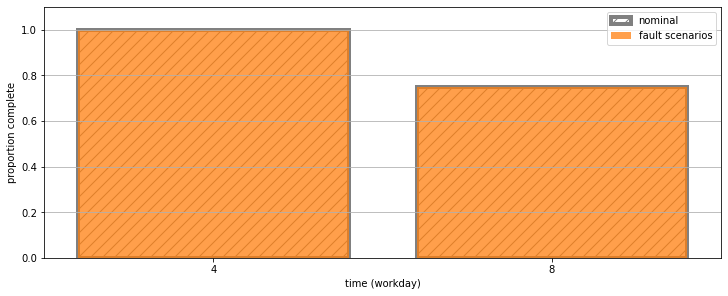

In [36]:
fig = rd.plot.resilience_factor_comparison(res_comp_hum, stack=True, maxy=1.1, xlabel='time (workday)', figsize=(10,4), title="", stat="proportion complete")  